In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [6]:
df = pd.read_csv(r'D:\new nan mudhalvan\Augerbine.csv')


In [4]:
df

,Type,Color,Size,Shape,Taste,weight(grams)
0,Italian Eggplant,Purple,Medium,Oval,Bitter,250
1,Japanese Eggplant,Purple,Medium,Long,Sweet,200
2,White Eggplant,White,Medium,Round,Mild,180
3,Indian Eggplant,Purple,Small,Oval,Bitter,150
4,Thai Eggplant,Green,Small,Round,Bitter,100
5,Ping Tung Long Eggplant,Purple,Long,Long,Mild,300
6,Rosa Bianca Eggplant,Purple,Medium,Round,Mild,220
7,Black Beauty Eggplant,Purple,Large,Oval,Sweet,300
8,Neon Eggplant,Purple,Medium,Oval,Sweet,280
9,Casper Eggplant,White,Small,Round,Mild,160


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           30 non-null     object
 1   Color          30 non-null     object
 2   Size           30 non-null     object
 3   Shape          30 non-null     object
 4   Taste          30 non-null     object
 5   weight(grams)  30 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


In [8]:
df.isna().sum()

Type             0
Color            0
Size             0
Shape            0
Taste            0
weight(grams)    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(30, 6)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
eggplant_df = pd.read_csv(r'D:\new nan mudhalvan\Augerbine.csv')  # Update with the filename of your dataset

# Step 2: Preprocess the data
X = eggplant_df.drop(columns=['Type'])  # Features
y = eggplant_df['Type']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Preprocess categorical variables (one-hot encoding)
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Step 5: Define the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Step 6: Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Step 7: Train the model
pipeline.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.0


In [16]:
X_train.shape

(24, 5)

In [17]:
y_train.unique()

array(['Lavender Touch Eggplant', 'Slim Jim Eggplant',
       'Long Purple Eggplant', 'Italian Eggplant', 'Thai Eggplant',
       'Turkish Orange Eggplant', 'Ping Tung Long Eggplant',
       'Green Goddess Eggplant', 'Listada de Gandia Eggplant',
       'Millionaire Eggplant', 'Japanese Eggplant', 'White Eggplant',
       'Violetta di Firenze Eggplant', 'Indian Eggplant',
       'Louisiana Long Green Eggplant', 'Ping Tung Eggplant',
       'Orient Express Eggplant', 'Twilight Eggplant',
       'Easter Egg Eggplant', 'Black Beauty Eggplant',
       'Graffiti Eggplant', 'Calliope Eggplant', 'Diamond Eggplant',
       'Rosa Bianca Eggplant'], dtype=object)

In [18]:
model_Seq = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[95]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [19]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_Seq.compile(loss = 'binary_crossentropy' , optimizer = optimizer,metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_Seq.h5' , save_best_only=True)

In [20]:
print("X_train data type: {X_train.dtype}")
print("y_train data type: {y_train.dtype}")


X_train data type: {X_train.dtype}
y_train data type: {y_train.dtype}


In [21]:
y_train = y_train[y_train != 'Sweet']

In [22]:
import matplotlib.pyplot as plt

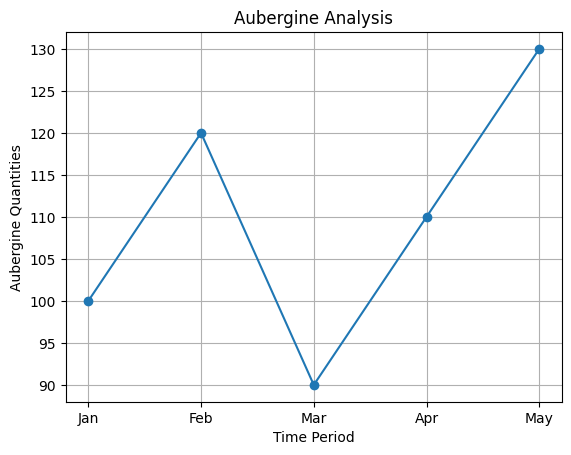

In [23]:
import pandas as pd

# Sample data with aubergine varieties
data = {'Time Period': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
        'Aubergine Variety': ['Variety A', 'Variety B', 'Variety A', 'Variety C', 'Variety B'],
        'Aubergine Quantities': [100, 120, 90, 110, 130]}

# Create a DataFrame
df = pd.DataFrame(data)

# Perform label encoding for 'Aubergine Variety'
df['Aubergine Variety'] = pd.Categorical(df['Aubergine Variety'])
df['Aubergine Variety'] = df['Aubergine Variety'].cat.codes

# Plotting the graph
plt.plot(df['Time Period'], df['Aubergine Quantities'], marker='o', linestyle='-')
plt.title('Aubergine Analysis')
plt.xlabel('Time Period')
plt.ylabel('Aubergine Quantities')
plt.grid(True)
plt.show()


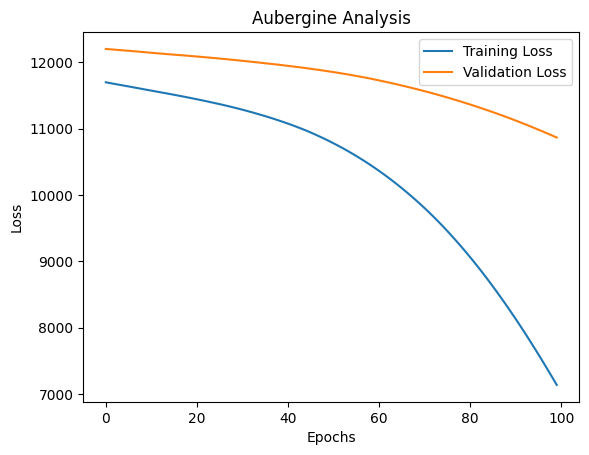

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample data for aubergine analysis
data = {
    'Type': ['Type A', 'Type B', 'Type A', 'Type C', 'Type B'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Large'],
    'Shape': ['Round', 'Oval', 'Round', 'Oval', 'Round'],
    'Taste': ['Bitter', 'Sweet', 'Bitter', 'Sweet', 'Bitter'],
    'Weight': [100, 120, 90, 110, 130]  # in grams
}

# Create a DataFrame
aubergine_df = pd.DataFrame(data)

# Convert categorical variables into numeric using one-hot encoding
aubergine_df = pd.get_dummies(aubergine_df, columns=['Type', 'Size', 'Shape', 'Taste'])

# Separate features (X) and target variable (y)
X = aubergine_df.drop('Weight', axis=1)
y = aubergine_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model_Seq = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_Seq.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_Seq.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Aubergine Analysis')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
model_Seq.evaluate(X_test , y_test)

1/1 [==============================] - 0s 25ms/step - loss: 12123.0615 - mae: 110.1048


[12123.0615234375, 110.10477447509766]

In [26]:
model_Seq.evaluate(X_test , y_test)

1/1 [==============================] - 0s 23ms/step - loss: 12123.0615 - mae: 110.1048


[12123.0615234375, 110.10477447509766]

In [28]:
def build_model(learning_rate=3e-3, input_shape=[95]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(1 , activation ='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss = 'binary_crossentropy' , optimizer = optimizer
                  ,metrics=["accuracy"])
    return model

In [29]:
!pip install scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

Defaulting to user installation because normal site-packages is not writeable


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 1/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 2/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 3/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 4/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 5/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 6/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 7/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 8/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 9/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 10/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 11/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 12/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 13/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 14/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 15/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 16/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 17/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 18/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 19/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 20/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 21/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 22/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 23/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 24/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 25/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 26/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 27/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 28/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 29/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 30/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 31/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 32/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 33/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 34/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 35/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 36/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 37/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 38/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 39/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 40/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 41/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 42/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 43/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 44/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 45/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 46/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 47/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 48/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 49/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 50/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 51/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 52/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 53/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 54/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 55/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 56/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 57/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 58/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 59/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 60/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 61/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 62/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 63/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 64/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 65/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 66/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 67/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 68/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 69/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 70/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 71/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 72/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 73/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 74/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 75/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 76/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 77/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 78/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 79/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 80/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 81/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 82/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 83/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 84/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 85/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 86/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 87/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 88/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 89/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 90/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 91/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 92/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 93/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 94/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 95/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 96/100 - Train accuracy: 1.0000, Test accuracy: 0.0000


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Epoch 97/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 98/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 99/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Epoch 100/100 - Train accuracy: 1.0000, Test accuracy: 0.0000
Final test accuracy after 100 epochs: 0.0000


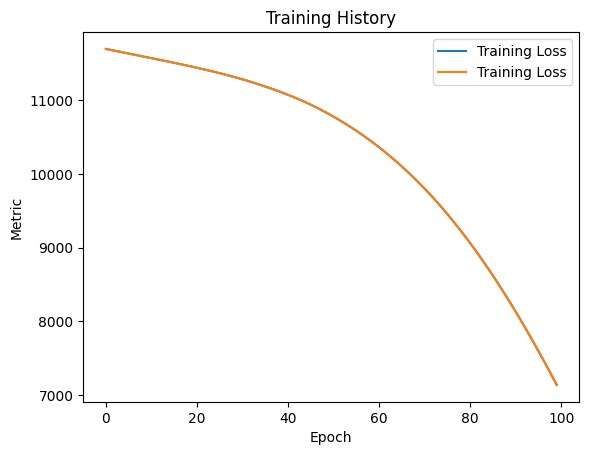

In [30]:
from sklearn.metrics import accuracy_score
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='constant', random_state=42)

# Train the model for multiple epochs
epochs = 100  # Number of epochs
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    ann_classifier.fit(X_train, y_train)  # Train the model for one epoch

    # Evaluate the model on the train set
    y_train_pred = ann_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the test set
    y_test_pred = ann_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs} - Train accuracy: {train_accuracy:.4f}, Test accuracy: {test_accuracy:.4f}")

# Print the final test accuracy
final_test_accuracy = test_accuracies[-1]
print(f"Final test accuracy after {epochs} epochs: {final_test_accuracy:.4f}")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training History')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
best_model = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant', random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         110       0.00      0.00      0.00       0.0
         120       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 0]
 [1 0]]


C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SRINIDHI\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics